Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Parâmetros C

In [14]:
# Dados separáveis
X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.0, random_state=42)

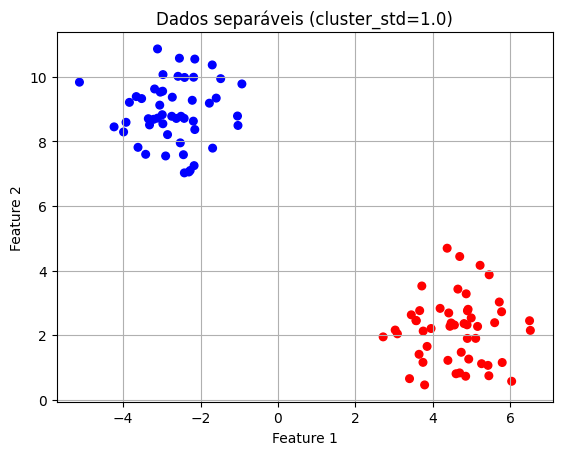

In [15]:
# Visualização
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
plt.title("Dados separáveis (cluster_std=1.0)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

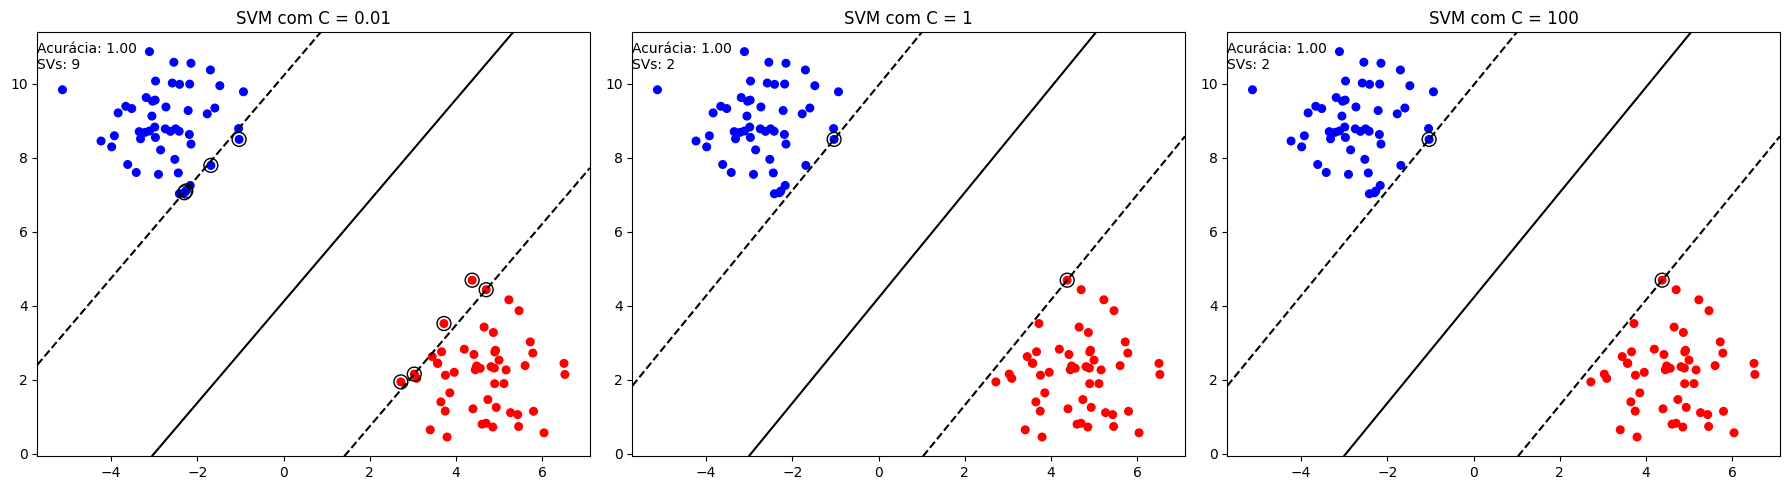

In [16]:
# Avaliação com diferentes valores de C
C_values = [0.01, 1, 100]

plt.figure(figsize=(18, 5))
for i, C in enumerate(C_values, 1):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    plt.subplot(1, len(C_values), i)
    plt.title(f"SVM com C = {C}")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(*xlim, 30)
    yy = np.linspace(*ylim, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k')
    score = clf.score(X, y)
    plt.text(xlim[0], ylim[1] - 1, f"Acurácia: {score:.2f}\nSVs: {len(clf.support_)}")

plt.tight_layout()
plt.show()

Dados Ruídosos

In [17]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=2.5, random_state=42)

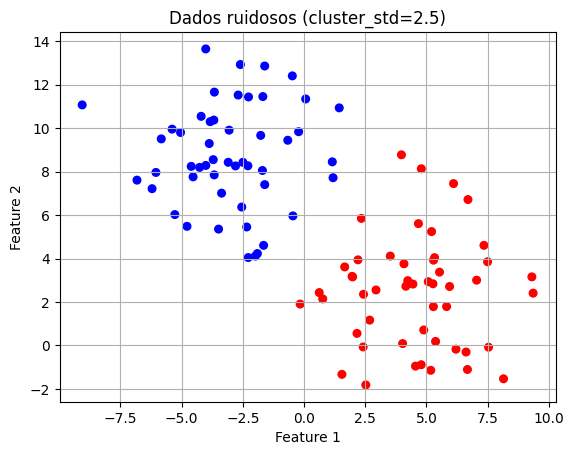

In [18]:
# Visualização
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
plt.title("Dados ruidosos (cluster_std=2.5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

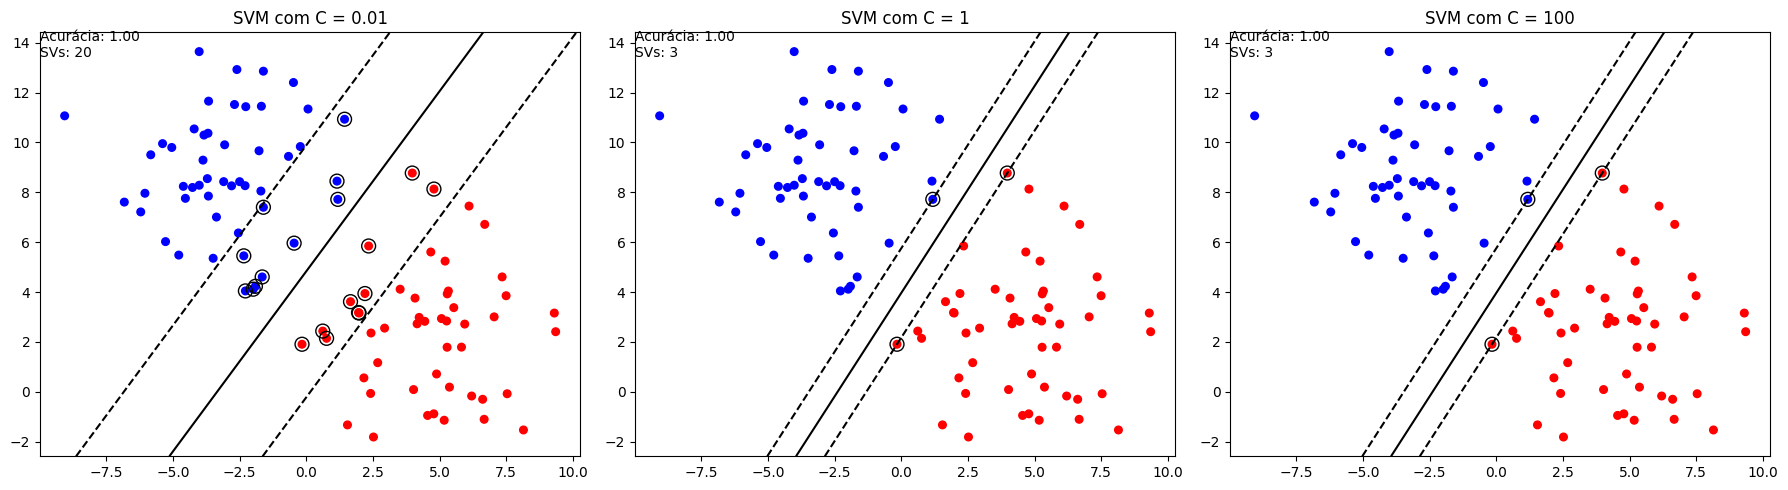

In [19]:
# Avaliação com diferentes valores de C
C_values = [0.01, 1, 100]

plt.figure(figsize=(18, 5))
for i, C in enumerate(C_values, 1):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    plt.subplot(1, len(C_values), i)
    plt.title(f"SVM com C = {C}")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(*xlim, 30)
    yy = np.linspace(*ylim, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k')
    score = clf.score(X, y)
    plt.text(xlim[0], ylim[1] - 1, f"Acurácia: {score:.2f}\nSVs: {len(clf.support_)}")

plt.tight_layout()
plt.show()

Dados com Outliers

In [20]:
# Dados ruidosos com outliers
X, y = make_blobs(n_samples=100, centers=2, cluster_std=2.0, random_state=42)
X = np.vstack([X, [[-10, -10], [10, 10]]])
y = np.hstack([y, [1, 0]])  # Classes propositalmente invertidas

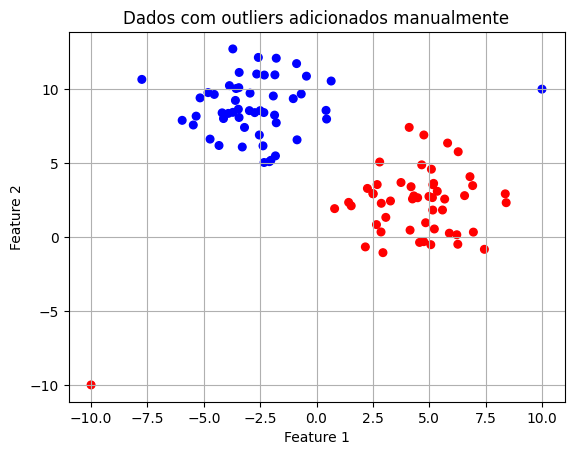

In [21]:
# Visualização
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
plt.title("Dados com outliers adicionados manualmente")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

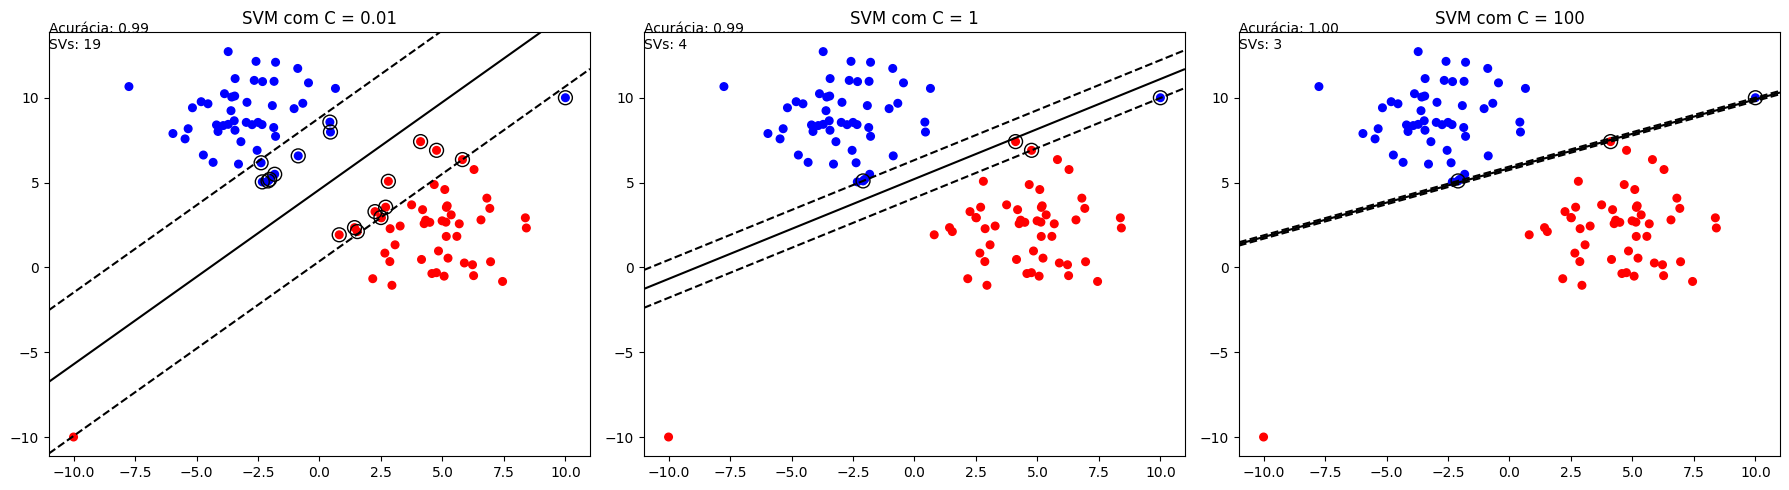

In [22]:
# Avaliação com diferentes valores de C
C_values = [0.01, 1, 100]

plt.figure(figsize=(18, 5))
for i, C in enumerate(C_values, 1):
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    plt.subplot(1, len(C_values), i)
    plt.title(f"SVM com C = {C}")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(*xlim, 30)
    yy = np.linspace(*ylim, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k')
    score = clf.score(X, y)
    plt.text(xlim[0], ylim[1] - 1, f"Acurácia: {score:.2f}\nSVs: {len(clf.support_)}")

plt.tight_layout()
plt.show()

Reflexões

**Qual valor de C é mais adequado para problemas com dados reais e ruidosos?**

Um valor de C mais alto, porém deve-se tomar cuidado com overfitting a partir de certos valores

**O que ocorre com os vetores de suporte conforme C aumenta?**

Os vetores de suporte criam uma margem menor em relação ao hiperplano

**Em que situação o modelo sofre overfitting?**

O modelo apresenta overfitting na situação em que C = 100

# Parâmetros Gamma

Geração dos Dados: make_moons

In [11]:
# Dados com ruído para dificultar separação linear
X, y = make_moons(n_samples=200, noise=0.25, random_state=42)

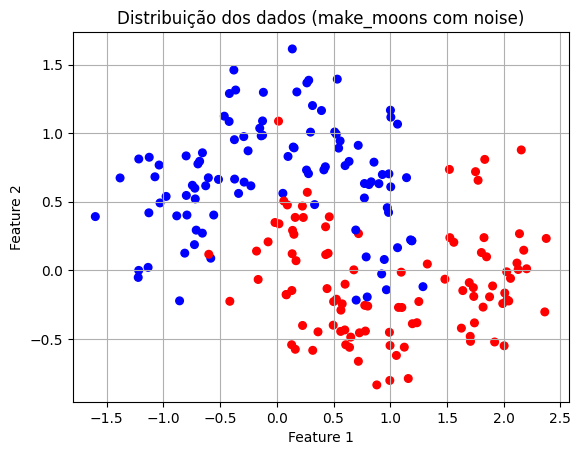

In [12]:
# Visualização
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
plt.title("Distribuição dos dados (make_moons com noise)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

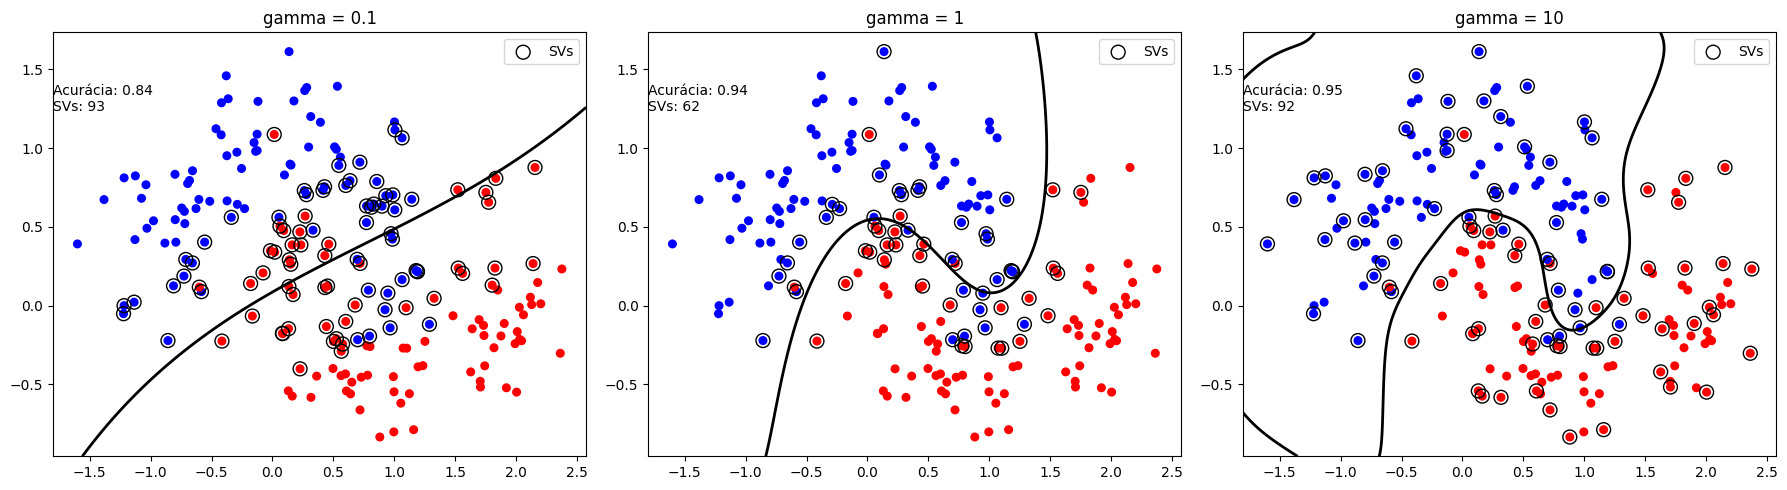

In [13]:
# Avaliando diferentes valores de gamma
gamma_values = [0.1, 1, 10]

plt.figure(figsize=(18, 5))
for i, gamma in enumerate(gamma_values, 1):
    clf = SVC(kernel='rbf', gamma=gamma, C=1.0)
    clf.fit(X, y)

    plt.subplot(1, len(gamma_values), i)
    plt.title(f"gamma = {gamma}")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)

    # Grade para decisão
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 500)
    yy = np.linspace(ylim[0], ylim[1], 500)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, levels=[0], linewidths=2, colors='k')

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k', label='SVs')
    ax.legend()
    plt.text(xlim[0], ylim[1] - 0.5, f"Acurácia: {clf.score(X, y):.2f}\nSVs: {len(clf.support_)}")

plt.tight_layout()
plt.show()

Reflexão

**Como o valor de gamma influencia a forma da fronteira de decisão?**

A influencia acontece em relação a variação do vetor de suporte

**Qual dos modelos parece mais robusto a dados com ruído?**

O modelo com gamma = 10 parece mais robusto

**O que acontece com o número de vetores de suporte conforme gamma aumenta?**

O vetor de suporte tem menos influência sobre a divisão dos dados

**Qual valor de gamma você escolheria para dados de sensores biomédicos com variabilidade natural?**

A escolha seria gamma = 10

# GridSearchCV

Otimizando Hiperparâmetros em SVM com GridSearchCV

In [2]:
# Dados
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

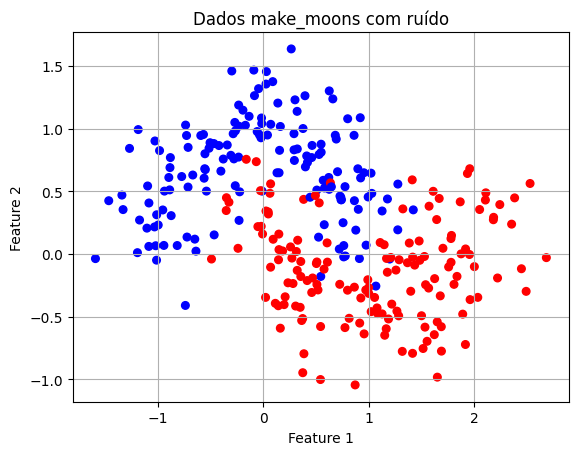

In [3]:
# Visualização
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)
plt.title("Dados make_moons com ruído")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [4]:
# Definindo os parâmetros para busca
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10]}

In [5]:
# Definindo o modelo
svc = SVC(kernel='rbf')

In [6]:
# GridSearchCV com validação cruzada
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Melhor combinação encontrada
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor score (validação cruzada):", grid_search.best_score_)

Melhores parâmetros encontrados: {'C': 1, 'gamma': 10}
Melhor score (validação cruzada): 0.9200000000000002


Visualização do Modelo Otimizado

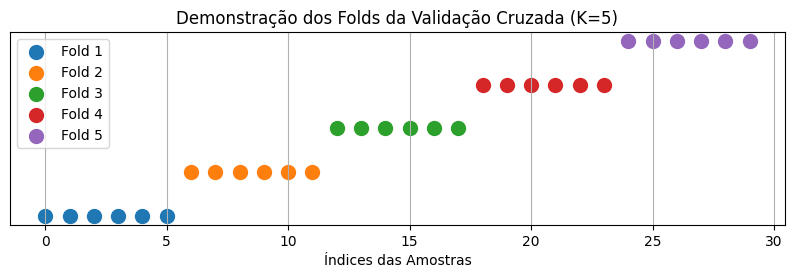

In [7]:
X_sample = np.zeros((30, 1))  # 30 amostras fictícias (índices)
kf = KFold(n_splits=5, shuffle=False)

plt.figure(figsize=(10, 2.5))
for i, (train_index, test_index) in enumerate(kf.split(X_sample)):
    y = np.ones(len(X_sample)) * np.nan
    y[test_index] = i
    plt.scatter(np.arange(len(X_sample)), y, label=f'Fold {i+1}', s=100)

plt.yticks([])
plt.xlabel("Índices das Amostras")
plt.title("Demonstração dos Folds da Validação Cruzada (K=5)")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Treina o melhor modelo encontrado
best_model = grid_search.best_estimator_
best_model.fit(X, y)

SVC(C=1, gamma=10)

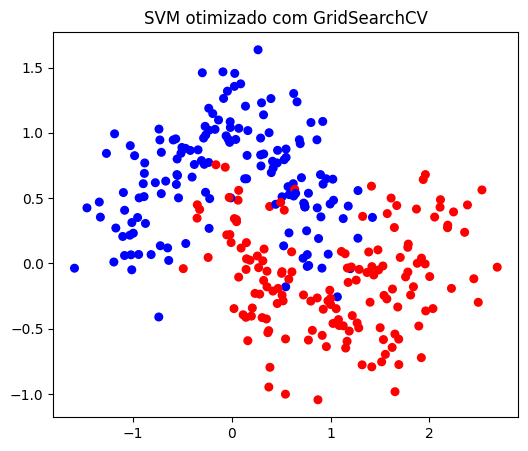

In [9]:
# Visualização da fronteira
plt.figure(figsize=(6, 5))
plt.title("SVM otimizado com GridSearchCV")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)

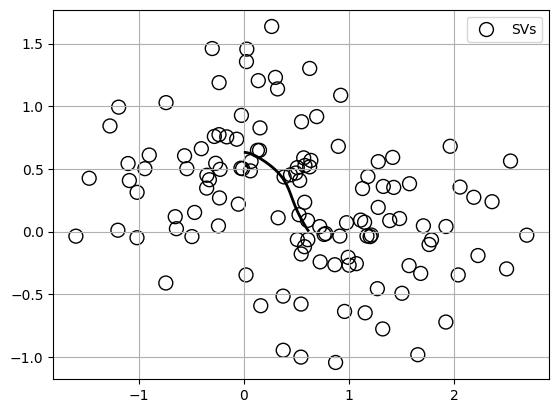

In [10]:
# Grade para decisão
xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
xx = np.linspace(xlim[0], xlim[1], 500)
yy = np.linspace(ylim[0], ylim[1], 500)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = best_model.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, levels=[0], linewidths=2, colors='k')
plt.scatter(best_model.support_vectors_[:, 0], best_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='SVs')
plt.legend()
plt.grid(True)
plt.show()


Reflexão

**Quais os riscos de escolher C e gamma manualmente?**

Criar um viés ou simplesmente adotar uma combinação não ideal para o conjunto de dados

**Por que a validação cruzada ajuda a evitar overfitting?**

Porque as situações de overfitting nos parâmetros são diferentes, assim ao fazer uma comparação cruzada ajuda a reduzir o overfitting

**Como o grid pode ser melhorado usando RandomizedSearchCV ou Bayesian Optimization**

Pode ser melhorado em relação a velocidade por não testar cada combinação de forma individual

# Relatório de Análise Crítica

**Quando um valor alto ou baixo de C é mais adequado?**

Um valor alto de C é mais adequado para dados com possíveis outliers e ruídos, criando uma margem menor com os vetores de suporte

**Como gamma afeta a capacidade de generalização do modelo?**

O parâmetro gamma altera a generalização do modelo por apresentar uma margem curva

**Em que casos GridSearchCV evita overfitting?**

Em casos nos quais um valor de C ou gamma separadamente o fariam dependendo de seus respectivos valores

**Qual modelo final apresentou melhor comportamento?**

O modelo que apresentou melhor comportamento foi o modelo com parâmetro gamma (gamma = 10), por fazer uma divisão melhor dos dados fornecidos